In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

from wordcloud import WordCloud, ImageColorGenerator
import re
from nltk.tokenize import word_tokenize as wt
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import io
import sklearn



In [ ]:
#to upload csv file
from google.colab import files


uploaded = files.upload()


In [ ]:
#all_data DataFrame created to convert the uploaded csv file to a dataframe.
all_data = pd.read_csv(io.BytesIO(uploaded['spam_ham_dataset.csv']))

In [ ]:
all_data

In [ ]:
nltk.download('stopwords')

In [ ]:
nltk.download('punkt')

In [ ]:
#spam_words contains all the words from the text column which are labelled as spam in 'label_num' column of the datadrame
spam_words = ' '.join(list(all_data[all_data['label_num'] == 1]['text']))

In [ ]:
#to see frequency of words in spam mails before removal of stopwords and special characters
from nltk import FreqDist
spam_token = nltk.tokenize.word_tokenize(spam_words)
spam_freq = FreqDist(spam_token)
spam_freq

In [ ]:
#converting all text to lower case
all_data['text'] =all_data['text'].apply(str.lower)

In [ ]:
#removing all special symbols by replacing them with space
all_data['text'] = all_data['text'].str.replace('\W', ' ', regex=True)

In [ ]:
all_data['text'] = all_data['text'].str.replace('subject', ' ')

In [ ]:
all_data

In [ ]:
stop_words = stopwords.words('english')
all_data['text'] = all_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
spam_words = ' '.join(list(all_data[all_data['label_num'] == 1]['text']))

In [ ]:
#frequency of words after removing stop words and special symbols
spam_token = nltk.tokenize.word_tokenize(spam_words)
spam_freq = FreqDist(spam_token)
spam_freq

FreqDist({'3': 1239, '_': 1218, 'com': 992, 'http': 983, '2': 858, 'company': 728, '1': 720, '0': 698, 'e': 638, 'www': 587, ...})

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

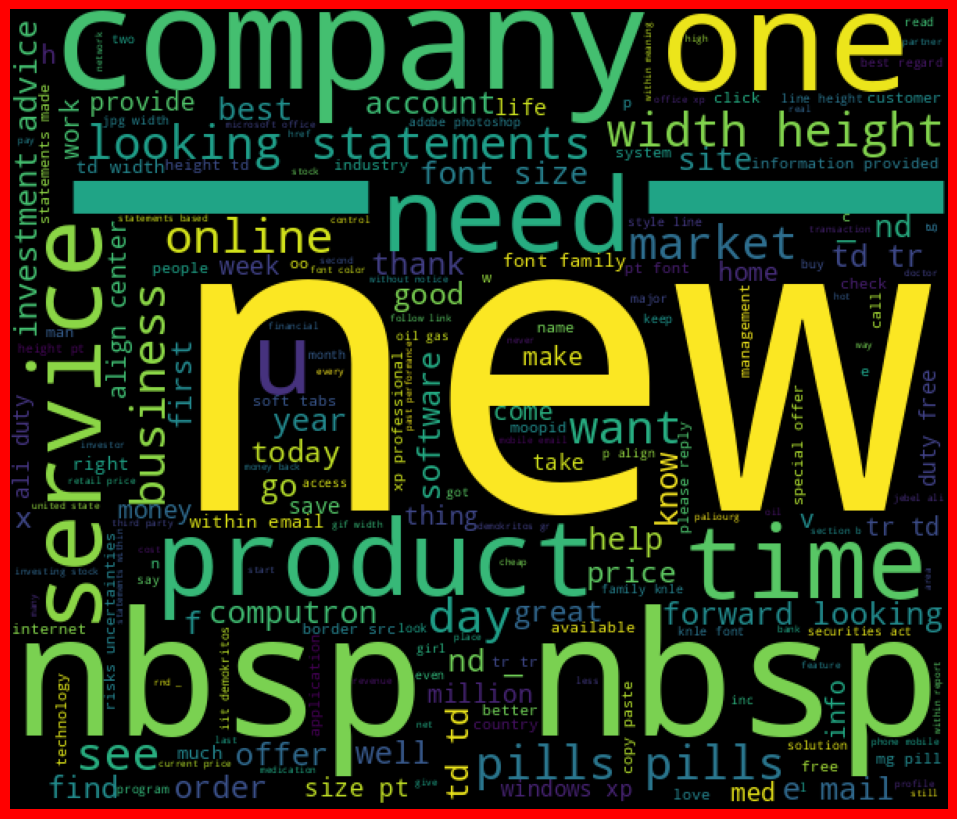

In [ ]:
#word cloud of spam mails
spam_words = ' '.join(list(all_data[all_data['label_num'] == 1]['text']))
spam_wc = WordCloud(width = 600,height = 512).generate(spam_words)

plt.figure(figsize = (12, 8), facecolor = 'r')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

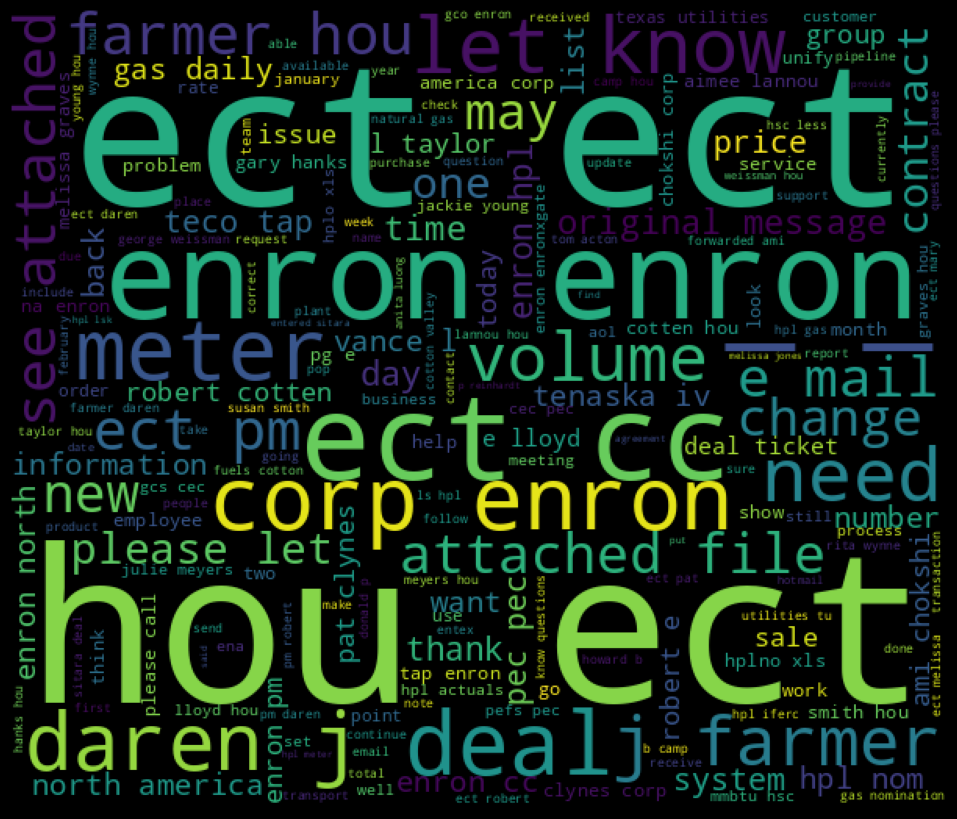

In [ ]:
#word cloud of real mails
ham_words = ' '.join(list(all_data[all_data['label_num'] == 0]['text']))
ham_wc = WordCloud(width = 600,height = 512).generate(ham_words)

plt.figure(figsize = (12, 8), facecolor = 'k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
all_data['text'] = all_data['text'].str.replace('subject', ' ')

In [ ]:
spam_words = ' '.join(list(all_data[all_data['label_num'] == 1]['text']))
spam_token = nltk.tokenize.word_tokenize(spam_words)
spam_freq = FreqDist(spam_token)
spam_freq

FreqDist({'3': 1239, '_': 1218, 'com': 992, 'http': 983, '2': 858, 'company': 728, '1': 720, '0': 698, 'e': 638, 'www': 587, ...})

In [ ]:
#removing numeric values from text
all_data['text'] = all_data['text'].str.replace('\d+', ' ')

<ipython-input-21-057c8dd0fdd4>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  all_data['text'] = all_data['text'].str.replace('\d+', ' ')


In [ ]:
spam_words = ' '.join(list(all_data[all_data['label_num'] == 1]['text']))
spam_token = nltk.tokenize.word_tokenize(spam_words)
spam_freq = FreqDist(spam_token)
spam_freq

FreqDist({'_': 1218, 'com': 992, 'http': 983, 'company': 728, 'e': 638, 'www': 587, 'information': 520, 'font': 515, 'td': 504, 'get': 485, ...})

In [ ]:
spam_data = all_data[all_data['label_num'] == 0]
real_data = all_data[all_data['label_num'] == 1]

In [ ]:
lemmatizer= WordNetLemmatizer()

In [ ]:
#lemmatization
all_data_lemma = []
for i in range(all_data.shape[0]):
    sp = all_data.iloc[i, 2]
    sp = re.sub('[^A-Za-z]', ' ', sp)
    sp = sp.lower()
    tokenized_sp = wt(sp)
    sp_processed = []
    for word in tokenized_sp:
        if word not in set(stopwords.words('english')):
            sp_processed.append(lemmatizer.lemmatize(word))
    sp_text = " ".join(sp_processed)
    all_data_lemma.append(sp_text)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(all_data_lemma).toarray()
y = all_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


# Define the hyperparameters to tune
alpha_values = [0.1, 0.5, 1.0]
fit_prior_values = [True, False]
class_prior_values = [None, [0.5, 0.5]]

# Define the classifier object
classifier = MultinomialNB()

# Define the grid of hyperparameters to search
param_grid = {'alpha': alpha_values,
              'fit_prior': fit_prior_values,
              'class_prior': class_prior_values}

# Create a grid search object to find the best hyperparameters
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='f1_macro')

# Fit the grid search object on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Extract the best classifier from the grid search object
classifier = grid_search.best_estimator_

# Predict on the test data
y_pred = classifier.predict(X_test)

# Generate and print the classification report
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues', cbar=False, annot_kws={"fontsize":14}, square=True)


In [ ]:
input_email = input("Enter the email content: ")

# process the input email
test_pred = pd.DataFrame([input_email], columns=['email'])
test_pred = test_pred['email'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords.words('english'))]))
test_pred = test_pred.str.replace('\W', ' ', regex=True)
test_pred = test_pred.apply(str.lower)

test_data_lemma = []
for i in range(test_pred.shape[0]):
    sp = test_pred.iloc[i]
    sp = re.sub('[^A-Za-z]', ' ', sp)
    sp = sp.lower()
    tokenized_sp = word_tokenize(sp)
    sp_processed = []
    for word in tokenized_sp:
        if word not in set(stopwords.words('english')):
            sp_processed.append(lemmatizer.lemmatize(word))
    sp_text = " ".join(sp_processed)
    test_data_lemma.append(sp_text)

# use vectorizer to transform the input email
u_pred = vectorizer.transform(test_data_lemma).toarray()

# predict if the email is spam or not
pred_proba = classifier.predict_proba(u_pred)[0]
pred_label = classifier.predict(u_pred)[0]

# display the appropriate message
if pred_label == 'ham':
    print("This email is not spam.")
else:
    print("This email is spam.")

print(f"Predicted probability of spam: {pred_proba[1]:.3f}")
print(f"Predicted probability of not spam: {pred_proba[0]:.3f}")


This email is not spam.
Predicted probability of spam: 0.295
Predicted probability of not spam: 0.705


In [ ]:
import pickle
pickle.dump(classifier,open('naive_bayes_classifier.pkl','wb'))

In [ ]:
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))